In [1]:
import numpy as np
import pandas as pd

#Loading the companies and rounds2 files in respective dataframes
companies = pd.read_csv(r"./Investment Assignment/companies.txt", sep ='\t', engine = 'python')
rounds2 = pd.read_csv(r"./Investment Assignment/rounds2.csv", sep =',', engine = 'python')
mapping = pd.read_csv(r"./Investment Assignment/mapping.csv", sep =',', engine = 'python')

In [2]:
#Number of Unique Company names in rounds2 dataframe
rounds2['company_permalink']=rounds2['company_permalink'].str.upper()
rounds2.company_permalink.nunique()

66368

In [3]:
#Number of Unique Company names in companies dataframe
companies['permalink']=companies['permalink'].str.upper()
companies.permalink.nunique()

66368

In [4]:
#Finding the column which can be used as a unique key for each company in the the companies df
companies.describe()
#We see that the only unique key is 'permalink' as its frequency is 1, also the count and unique values for 'permalink' are same.

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
count,66368,66367,61310,63220,66368,59410,57821,58338,58340,51147
unique,66368,66102,61191,27296,4,137,311,1092,5111,3978
top,/ORGANIZATION/HIPSTER,Blink,http://www.askforoffer.com,Software,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012
freq,1,4,5,3995,53034,37601,12900,8804,3526,2730


In [5]:
#Checking for any companies in the rounds2 file which are not  present in companies
rounds2['company_permalink'].isin(companies['permalink']).value_counts()
#There are no False values in the output meaning all companies in rounds2 file are there in companies file.

True    114949
Name: company_permalink, dtype: int64

In [6]:
#Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?
master_frame = pd.merge(rounds2, companies, how='inner', left_on='company_permalink', right_on = 'permalink' )
master_frame.count()

company_permalink          114949
funding_round_permalink    114949
funding_round_type         114949
funding_round_code          31140
funded_at                  114949
raised_amount_usd           94959
permalink                  114949
name                       114948
homepage_url               108815
category_list              111539
status                     114949
country_code               106271
state_code                 104003
region                     104782
city                       104785
founded_at                  94428
dtype: int64

In [7]:
# identifying rows having all missing values
master_frame.isnull().all(axis=1).sum()

0

In [8]:
#Checking for missing values in columns
master_frame.isnull().any(axis=0)


company_permalink          False
funding_round_permalink    False
funding_round_type         False
funding_round_code          True
funded_at                  False
raised_amount_usd           True
permalink                  False
name                        True
homepage_url                True
category_list               True
status                     False
country_code                True
state_code                  True
region                      True
city                        True
founded_at                  True
dtype: bool

In [9]:
# Finding missing values percentage (column-wise)
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
dtype: float64

In [10]:
#since there is more than 70% data missing in column funding_round_code dropping this column as it will not be useful anyways
master_frame=master_frame.drop('funding_round_code',axis=1)
#Also, we do not need founded_at information
master_frame=master_frame.drop('founded_at',axis=1)

In [11]:
#Finding different investment types
master_frame.funding_round_type.unique()

array(['venture', 'seed', 'undisclosed', 'equity_crowdfunding',
       'convertible_note', 'private_equity', 'debt_financing', 'angel',
       'grant', 'secondary_market', 'post_ipo_equity', 'post_ipo_debt',
       'product_crowdfunding', 'non_equity_assistance'], dtype=object)

In [12]:
#Since Spark Funds wants to choose one of these four investment types - seed, venture, angel,Private equity, we do not need other types, so removing those corresponding rows.
master_frame = master_frame[master_frame['funding_round_type'].isin(['venture','seed','angel','private_equity'])]

In [13]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          14.59
permalink                   0.00
name                        0.00
homepage_url                4.39
category_list               2.65
status                      0.00
country_code                7.76
state_code                  9.83
region                      9.07
city                        9.06
dtype: float64

In [14]:
# Since raised_amount_usd still contains a lot of missing data (and imputing 14.59% values will introduce heavy bias), removing the missing rows where raised_amount_usd is null.
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]
master_frame.count()

company_permalink          80627
funding_round_permalink    80627
funding_round_type         80627
funded_at                  80627
raised_amount_usd          80627
permalink                  80627
name                       80626
homepage_url               77182
category_list              79772
status                     80627
country_code               75606
state_code                 74055
region                     74564
city                       74567
dtype: int64

In [15]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               4.27
category_list              1.06
status                     0.00
country_code               6.23
state_code                 8.15
region                     7.52
city                       7.52
dtype: float64

In [16]:
#Imputing values in column homepage_url, since it is not required for analysis but may be useful
master_frame.loc[pd.isnull(master_frame['homepage_url']), ['homepage_url']] = 'URL Not Available'


In [17]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               0.00
category_list              1.06
status                     0.00
country_code               6.23
state_code                 8.15
region                     7.52
city                       7.52
dtype: float64

In [18]:
#Checking for rows that have 5 or more null values, which means it has neither category mentioned nor country or region information, and will not help us in analysis
len(master_frame[master_frame.isnull().sum(axis=1) >= 5].index)

373

In [19]:
#Retaining rows which have less than 5 NaN values
master_frame = master_frame[master_frame.isnull().sum(axis=1) < 5]

In [20]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               0.00
category_list              0.60
status                     0.00
country_code               5.79
state_code                 7.72
region                     7.09
city                       7.09
dtype: float64

In [21]:
#Now we have only rows related to area as null. But, we still have many rows for which the 'country_code', 'state_code','region','city' columns are all null
len(master_frame[master_frame.isnull().sum(axis=1) == 4].index)
#removing the rows which have all 4 values as null as they will not help us with the country analysis.

4656

In [22]:
#Retaining rows which have less than 4 NaN values
master_frame = master_frame[master_frame.isnull().sum(axis=1) < 4]

In [23]:
master_frame['country_code'].notnull().value_counts()

True    75598
Name: country_code, dtype: int64

In [24]:
master_frame.loc[:, ['country_code', 'state_code','region','city']].isnull().any(axis=1).value_counts()

False    73756
True      1842
dtype: int64

In [25]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               0.00
category_list              0.63
status                     0.00
country_code               0.00
state_code                 2.04
region                     1.37
city                       1.36
dtype: float64

In [26]:
#Imputing dummy values for 'state_code','region' and 'city', because we are interested in the country code which is already available
master_frame.loc[pd.isnull(master_frame['state_code']), ['state_code']] = '0'
master_frame.loc[pd.isnull(master_frame['region']), ['region']] = 'Not Available'
master_frame.loc[pd.isnull(master_frame['city']), ['city']] = 'Not Available'

In [27]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               0.00
category_list              0.63
status                     0.00
country_code               0.00
state_code                 0.00
region                     0.00
city                       0.00
dtype: float64

In [28]:
#We are left with only a very small percentage of missing values in category_list column
master_frame['category_list'].isnull().sum()

474

In [29]:
#Imputing values in column category_list with the top category, since only 0.63% values will be affected,it will not introduce heavy bias
#Finding top Category
master_frame['category_list'] = master_frame['category_list'].astype('category')
master_frame['category_list'].describe()


count             75124
unique            19758
top       Biotechnology
freq               6002
Name: category_list, dtype: object

In [30]:
master_frame.loc[pd.isnull(master_frame['category_list']), ['category_list']] = 'Biotechnology'

In [31]:
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)
#Finally we have no Null values in the data.

company_permalink          0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
permalink                  0.0
name                       0.0
homepage_url               0.0
category_list              0.0
status                     0.0
country_code               0.0
state_code                 0.0
region                     0.0
city                       0.0
dtype: float64

In [32]:
master_frame.info()
master_frame.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75598 entries, 0 to 114947
Data columns (total 14 columns):
company_permalink          75598 non-null object
funding_round_permalink    75598 non-null object
funding_round_type         75598 non-null object
funded_at                  75598 non-null object
raised_amount_usd          75598 non-null float64
permalink                  75598 non-null object
name                       75597 non-null object
homepage_url               75598 non-null object
category_list              75598 non-null category
status                     75598 non-null object
country_code               75598 non-null object
state_code                 75598 non-null object
region                     75598 non-null object
city                       75598 non-null object
dtypes: category(1), float64(1), object(12)
memory usage: 9.0+ MB


(75598, 14)

In [33]:
#Fraction of rows lost
(114949-len(master_frame.index))/114949
#We have lost 34% observations in cleaning the missing values. 

0.34233442657178403

In [34]:
master_frame['funding_round_type'].describe()

count       75598
unique          4
top       venture
freq        48107
Name: funding_round_type, dtype: object

In [35]:
#Finding the average funding funding_round_type-wise (in million USD)
total_investment = master_frame['raised_amount_usd'].sum()/1000000
print(total_investment)
mf_by_fundtype = master_frame.groupby('funding_round_type')
table1 = mf_by_fundtype['raised_amount_usd'].sum()/(total_investment*1000000)
table2 = mf_by_fundtype['raised_amount_usd'].mean()/1000000

table1.to_frame()
table2.to_frame()


719865.433644


,raised_amount_usd
funding_round_type,
angel,0.968560
private_equity,73.618564
seed,0.748160
venture,11.736439


In [36]:
#Since Spark Funds wants to invest between 5 to 15 million USD per investment round, Venture investment type is the most suitable for it
#So filtering out other data.
master_frame_ft = master_frame[master_frame['funding_round_type']=='venture']
master_frame_ft.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48107 entries, 0 to 114941
Data columns (total 14 columns):
company_permalink          48107 non-null object
funding_round_permalink    48107 non-null object
funding_round_type         48107 non-null object
funded_at                  48107 non-null object
raised_amount_usd          48107 non-null float64
permalink                  48107 non-null object
name                       48107 non-null object
homepage_url               48107 non-null object
category_list              48107 non-null category
status                     48107 non-null object
country_code               48107 non-null object
state_code                 48107 non-null object
region                     48107 non-null object
city                       48107 non-null object
dtypes: category(1), float64(1), object(12)
memory usage: 6.0+ MB


In [37]:
#Spark Funds wants to see the top nine countries which have received the highest total funding(in million USD)
#Getting the Top 9 Countries with highest ivestments
top9 = master_frame_ft
top9['country_code'] = top9['country_code'].astype('category')
list_top9 = top9['country_code'].value_counts('raised_amount_usd').sort_values(ascending = False).head(9)
list_top9 = list_top9.index.tolist()
#Filtering data only for the top9 countries
top9 = top9[top9['country_code'].isin(list_top9)]
top9.country_code.unique()


C:\Users\epanjee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


[IND, CHN, CAN, USA, GBR, FRA, ESP, DEU, ISR]
Categories (9, object): [IND, CHN, CAN, USA, ..., FRA, ESP, DEU, ISR]

In [38]:
#To Identify the top three English-speaking countries in the data frame top9, we extract the English Speaking countries from the URL provided
import requests, bs4

# getting HTML from the Google Play web page
url = "https://en.wikipedia.org/wiki/List_of_territorial_entities_where_English_is_an_official_language"
req = requests.get(url)

# creating a bs4 object to hold the content of the web page
soup = bs4.BeautifulSoup(req.content, "html5lib")
#Extracting all tables in the page
My_table = str(soup.find_all('table',{'class':'wikitable sortable'}))
english_speaking = pd.DataFrame(columns=['country_code','english_official'])
#Adding the rows for english speaking and non-english speaking countries
for country in list_top9 :
    if country in My_table :
        english_speaking = english_speaking.append({'country_code': country, 'english_official' : 'Yes' }, ignore_index=True)
    else :
        english_speaking = english_speaking.append({'country_code': country, 'english_official' : 'No' }, ignore_index=True)

english_speaking

,country_code,english_official
0,USA,Yes
1,GBR,Yes
2,CHN,No
3,CAN,Yes
4,FRA,No
5,IND,Yes
6,ISR,No
7,DEU,No
8,ESP,No


In [39]:
#merging the top9 and english_speaking dataframes.
top9 = pd.merge(top9, english_speaking, how='left', on='country_code')
top9.count()

company_permalink          44425
funding_round_permalink    44425
funding_round_type         44425
funded_at                  44425
raised_amount_usd          44425
permalink                  44425
name                       44425
homepage_url               44425
category_list              44425
status                     44425
country_code               44425
state_code                 44425
region                     44425
city                       44425
english_official           44425
dtype: int64

In [107]:
#english speaking conurties
top_english_speaking = top9[top9['english_official'] == "Yes"]
#Top3 fundings country-wise (in million USD)
top_by_country = top_english_speaking.groupby('country_code')
(top_by_country['raised_amount_usd'].sum().sort_values(ascending=False).head(3)/1000000).to_frame()


,raised_amount_usd
country_code,
USA,422510.842796
GBR,20234.971737
IND,14391.858718


In [108]:
top_english_speaking.category_list.unique()

[Media, Biotechnology, Analytics, Apps|Cable|Distribution|Software, Education, ..., Billing|SaaS|Software, Concerts|Curated Web|Entertainment|Events|Kids..., 3D|3D Printing|Content, Crowdsourcing|Knowledge Management, Facebook Applications|Games|Networking|Technology]
Length: 8067
Categories (8067, object): [Media, Biotechnology, Analytics, Apps|Cable|Distribution|Software, ..., Concerts|Curated Web|Entertainment|Events|Kids..., 3D|3D Printing|Content, Crowdsourcing|Knowledge Management, Facebook Applications|Games|Networking|Technology]

In [42]:
# Create a function to be applied to split and get the primary_sector
def split_sector(str):
    return [x[:] for x in str.split("|")][0]

top_english_speaking['primary_sector'] = top_english_speaking.category_list.apply(split_sector)

C:\Users\epanjee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [43]:
top_english_speaking.head(10)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,english_official,primary_sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,Yes,Media
2,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Yes,Biotechnology
3,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Yes,Analytics
4,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Yes,Analytics
5,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Yes,Analytics
6,/ORGANIZATION/1-MAINSTREAM,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,Yes,Apps
7,/ORGANIZATION/10-MINUTES-WITH,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0,/ORGANIZATION/10-MINUTES-WITH,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,Yes,Education
8,/ORGANIZATION/1000MEMORIES,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.0,/ORGANIZATION/1000MEMORIES,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,Yes,Curated Web
9,/ORGANIZATION/1000MUSEUMS-COM,/funding-round/13be128d655076a025221d7fddc90d68,venture,14-10-2009,265940.0,/ORGANIZATION/1000MUSEUMS-COM,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,Yes,Curated Web
10,/ORGANIZATION/1000MUSEUMS-COM,/funding-round/6aeb32ab3fc05db2b606d7a2466e8c09,venture,15-01-2014,2906832.0,/ORGANIZATION/1000MUSEUMS-COM,1000museums.com,http://www.1000museums.com,Curated Web,operating,USA,MA,MA - Other,Lenox,Yes,Curated Web


In [44]:
#We see mapping ['category_list'] has 'Analytics' as 'A0lytics', meaning all 'na' are '0'. Replacing these values to correct them
mapping['category_list'] = mapping['category_list'].str.replace('0','na')

mapping['category_list'] = mapping['category_list'].str.replace('Enterprise 2.na','Enterprise 2.0')
mapping['category_list'] = mapping['category_list'].str.title()

In [45]:
#Introducing new column master_sector in mapping dataframe which will have the corresponding sector name instead of 0,1 mapping
conditions = [
    mapping['Automotive & Sports'] == 1,
    mapping['Blanks'],
    mapping['Cleantech / Semiconductors'] == 1,
    mapping['Entertainment'] == 1,
    mapping['Health'] == 1,
    mapping['Manufacturing'] == 1,    
    mapping['News, Search and Messaging'] == 1,
    mapping['Others'] == 1,
    mapping['Social, Finance, Analytics, Advertising'] == 1
]

outputs = ['Automotive & Sports', 'Blanks', 'Cleantech / Semiconductors',
       'Entertainment', 'Health', 'Manufacturing',
       'News, Search and Messaging', 'Others',
       'Social, Finance, Analytics, Advertising']
mapping['main_sector'] = np.select(conditions, outputs, 'Blanks')

C:\Users\epanjee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:18: DeprecationWarning: select condlists containing integer ndarrays is deprecated and will be removed in the future. Use `.astype(bool)` to convert to bools.


In [46]:
mapping.head(10)
top_english_speaking['primary_sector'] = top_english_speaking['primary_sector'].str.title()

C:\Users\epanjee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [47]:
top_english_speaking = pd.merge(top_english_speaking, mapping[['category_list','main_sector']], how='left', left_on='primary_sector',right_on='category_list')

In [48]:
top_english_speaking.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,english_official,primary_sector,category_list_y,main_sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,Yes,Media,Media,Entertainment
1,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Yes,Biotechnology,Biotechnology,Cleantech / Semiconductors
2,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Yes,Analytics,Analytics,"Social, Finance, Analytics, Advertising"
3,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Yes,Analytics,Analytics,"Social, Finance, Analytics, Advertising"
4,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Yes,Analytics,Analytics,"Social, Finance, Analytics, Advertising"


In [49]:
#Finding if main_sector still has missing values
round(100*(top_english_speaking.isnull().sum()/len(top_english_speaking.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               0.00
category_list_x            0.00
status                     0.00
country_code               0.00
state_code                 0.00
region                     0.00
city                       0.00
english_official           0.00
primary_sector             0.00
category_list_y            0.03
main_sector                0.03
dtype: float64

In [50]:
top_english_speaking[pd.isnull(top_english_speaking['main_sector'])].primary_sector.unique()

array(['Natural Gas Uses', 'Adaptive Equipment', 'Racing',
       'Specialty Retail', 'Biotechnology And Semiconductor',
       'Rapidly Expanding', 'Product Search', 'Greentech', 'Retirement'],
      dtype=object)

In [51]:
#Imputing values for 'main_sector'
conditions = [
    top_english_speaking['primary_sector'] == 'Racing',
    top_english_speaking['primary_sector'].isin(['Natural Gas Uses', 'Biotechnology And Semiconductor','Greentech']),
    top_english_speaking['primary_sector'] == 'Adaptive Equipment',
    top_english_speaking['primary_sector'].isin(['Product Search','Retirement','Rapidly Expanding']),
    top_english_speaking['primary_sector'] == 'Specialty Retail'
]

outputs = ['Automotive & Sports','Cleantech / Semiconductors','Manufacturing','Others', 'Social, Finance, Analytics, Advertising']
top_english_speaking['main_sector'] = np.select(conditions, outputs, top_english_speaking['main_sector'])

In [52]:
#Finding if main_sector still has missing values
round(100*(top_english_speaking.isnull().sum()/len(top_english_speaking.index)), 2)

company_permalink          0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
permalink                  0.00
name                       0.00
homepage_url               0.00
category_list_x            0.00
status                     0.00
country_code               0.00
state_code                 0.00
region                     0.00
city                       0.00
english_official           0.00
primary_sector             0.00
category_list_y            0.03
main_sector                0.00
dtype: float64

In [53]:
#Dropping duplicate columns for 'category_list'
top_english_speaking = top_english_speaking.drop(columns=['category_list_y'])
top_english_speaking =top_english_speaking.rename(columns={"category_list_x": "category_list"})

In [54]:
top_english_speaking.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,english_official,primary_sector,main_sector
0,/ORGANIZATION/-FAME,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,/ORGANIZATION/-FAME,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,Yes,Media,Entertainment
1,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0,/ORGANIZATION/0NDINE-BIOMEDICAL-INC,Ondine Biomedical Inc.,http://ondinebio.com,Biotechnology,operating,CAN,BC,Vancouver,Vancouver,Yes,Biotechnology,Cleantech / Semiconductors
2,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Yes,Analytics,"Social, Finance, Analytics, Advertising"
3,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Yes,Analytics,"Social, Finance, Analytics, Advertising"
4,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Yes,Analytics,"Social, Finance, Analytics, Advertising"


In [55]:
#Creating 3 Dataframes for top3 countries
D1 = top_english_speaking[top_english_speaking['country_code'] == 'USA']
D2 = top_english_speaking[top_english_speaking['country_code'] == 'GBR']
D3 = top_english_speaking[top_english_speaking['country_code'] == 'IND']

In [56]:
#Adding new columns to each Dataframes for storing count of investments for each main sector in a separate column
D1['investment_count_by_main_sector'] = D1.groupby('main_sector')['main_sector'].transform('count')
D2['investment_count_by_main_sector'] = D2.groupby('main_sector')['main_sector'].transform('count')
D3['investment_count_by_main_sector'] = D3.groupby('main_sector')['main_sector'].transform('count')

C:\Users\epanjee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\epanjee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\epanjee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [57]:
#Adding new columns to each Dataframes for storing sum of investments for each main sector in a separate column
D1['amount_by_main_sector'] = D1.groupby('main_sector')['raised_amount_usd'].transform('sum')
D2['amount_by_main_sector'] = D2.groupby('main_sector')['raised_amount_usd'].transform('sum')
D3['amount_by_main_sector'] = D3.groupby('main_sector')['raised_amount_usd'].transform('sum')

C:\Users\epanjee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\epanjee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\epanjee\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.

In [78]:
D2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,english_official,primary_sector,main_sector,investment_count_by_main_sector,amount_by_main_sector
6,/ORGANIZATION/10-MINUTES-WITH,/funding-round/0faccbbcc5818dc5326469f13f5a8ac8,venture,09-10-2014,4000000.0,/ORGANIZATION/10-MINUTES-WITH,10 Minutes With,http://10minuteswith.com,Education,operating,GBR,H9,London,London,Yes,Education,Others,516,4.492220e+09
100,/ORGANIZATION/31DOVER,/funding-round/b95cb5a74632e596e19a845e405ef14b,venture,01-03-2014,2274716.0,/ORGANIZATION/31DOVER,31Dover,http://www.31dover.com,E-Commerce|Wine And Spirits,operating,GBR,H9,London,London,Yes,E-Commerce,Others,516,4.492220e+09
112,/ORGANIZATION/365SCORES,/funding-round/48212f931f542fdef78810bc87aef086,venture,29-09-2014,5500000.0,/ORGANIZATION/365SCORES,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,Yes,Android,"Social, Finance, Analytics, Advertising",421,3.773329e+09
113,/ORGANIZATION/365SCORES,/funding-round/493f78ea0ca33cfac48a57b2351b154b,venture,28-01-2013,1200000.0,/ORGANIZATION/365SCORES,365Scores,http://biz.365scores.com,Android|Apps|iPhone|Mobile|Sports,operating,GBR,H9,London,London,Yes,Android,"Social, Finance, Analytics, Advertising",421,3.773329e+09
161,/ORGANIZATION/3SUN,/funding-round/f1d8c6491b45bcf2a35ef1cf5cae96c4,venture,03-03-2014,15152514.0,/ORGANIZATION/3SUN,3sun,http://3sungroup.com,Clean Technology,operating,GBR,I9,Not Available,Not Available,Yes,Clean Technology,Cleantech / Semiconductors,455,5.235449e+09


In [80]:
top3 = pd.concat([D1, D2, D3]) 
top3.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,english_official,primary_sector,main_sector,investment_count_by_main_sector,amount_by_main_sector
2,/ORGANIZATION/0XDATA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Yes,Analytics,"Social, Finance, Analytics, Advertising",7247,8.652540e+10
3,/ORGANIZATION/0XDATA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Yes,Analytics,"Social, Finance, Analytics, Advertising",7247,8.652540e+10
4,/ORGANIZATION/0XDATA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,/ORGANIZATION/0XDATA,H2O.ai,http://h2o.ai/,Analytics,operating,USA,CA,SF Bay Area,Mountain View,Yes,Analytics,"Social, Finance, Analytics, Advertising",7247,8.652540e+10
5,/ORGANIZATION/1-MAINSTREAM,/funding-round/b952cbaf401f310927430c97b68162ea,venture,17-03-2015,5000000.0,/ORGANIZATION/1-MAINSTREAM,1 Mainstream,http://www.1mainstream.com,Apps|Cable|Distribution|Software,acquired,USA,CA,SF Bay Area,Cupertino,Yes,Apps,"News, Search and Messaging",4356,4.560052e+10
7,/ORGANIZATION/1000MEMORIES,/funding-round/502bd0e50c27616995e4bdad24605ef8,venture,16-02-2011,2520000.0,/ORGANIZATION/1000MEMORIES,1000memories,http://1000memories.com,Curated Web,acquired,USA,CA,SF Bay Area,San Francisco,Yes,Curated Web,"News, Search and Messaging",4356,4.560052e+10


In [58]:
#Total number of investments (count) per country
for df in (D1,D2,D3):
    print("Investment Count in Country",df.country_code.unique())
    print(df.investment_count_by_main_sector.unique().sum())


Investment Count in Country ['USA']
36139
Investment Count in Country ['GBR']
2054
Investment Count in Country ['IND']
824


In [59]:
#Total number of investments (amount) per country
for df in (D1,D2,D3):
    print("Investment amount in Country",df.country_code.unique())
    print(df.amount_by_main_sector.unique().sum())


Investment amount in Country ['USA']
422510842796.0
Investment amount in Country ['GBR']
20234971737.0
Investment amount in Country ['IND']
14391858718.0


In [60]:
d1=D1
d2=D2
d3=D3
#finding Top 3 main sectors per Country (number of investment-wise)
a1 = pd.unique(d1[['main_sector','investment_count_by_main_sector']].values.ravel()).reshape(8,2)
a2 = pd.unique(d2[['main_sector','investment_count_by_main_sector']].values.ravel()).reshape(8,2)
a3 = pd.unique(d3[['main_sector','investment_count_by_main_sector']].values.ravel()).reshape(8,2)

print("Top Sectors in :USA\n",a1[np.argsort(-a1[:, 1])])
print("Top Sectors in :GBR\n",a2[np.argsort(-a2[:, 1])])
print("Top Sectors in :IND\n",a3[np.argsort(-a3[:, 1])])


Top Sectors in :USA
 [['Others' 8318]
 ['Cleantech / Semiconductors' 8195]
 ['Social, Finance, Analytics, Advertising' 7247]
 ['News, Search and Messaging' 4356]
 ['Health' 3269]
 ['Manufacturing' 2455]
 ['Entertainment' 1794]
 ['Automotive & Sports' 505]]
Top Sectors in :GBR
 [['Others' 516]
 ['Cleantech / Semiconductors' 455]
 ['Social, Finance, Analytics, Advertising' 421]
 ['News, Search and Messaging' 241]
 ['Entertainment' 136]
 ['Manufacturing' 122]
 ['Health' 118]
 ['Automotive & Sports' 45]]
Top Sectors in :IND
 [['Others' 284]
 ['Social, Finance, Analytics, Advertising' 147]
 ['News, Search and Messaging' 130]
 ['Entertainment' 76]
 ['Cleantech / Semiconductors' 59]
 ['Manufacturing' 55]
 ['Health' 42]
 ['Automotive & Sports' 31]]


In [61]:
#Company received the hightest investment in Top main_sector
D11 = D1[D1['main_sector']=='Others']
print("Top Company in Top Sector in USA\n",D11.groupby('name').raised_amount_usd.sum().sort_values(ascending=False).head(1))
D21 = D2[D2['main_sector']=='Others' ]
print("Top Company in Top Sector in GBR\n",D21.groupby('name').raised_amount_usd.sum().sort_values(ascending=False).head(1))
D31 = D3[D3['main_sector']=='Others' ]
print("Top Company in Top Sector in IND\n",D31.groupby('name').raised_amount_usd.sum().sort_values(ascending=False).head(1))


Top Company in Top Sector in USA
 name
SoFi    1.365200e+09
Name: raised_amount_usd, dtype: float64
Top Company in Top Sector in GBR
 name
OneWeb    500000000.0
Name: raised_amount_usd, dtype: float64
Top Company in Top Sector in IND
 name
Flipkart    2.451000e+09
Name: raised_amount_usd, dtype: float64


In [62]:
#Company received the hightest investment in second best main_sector
D12 = D1[D1['main_sector']=='Cleantech / Semiconductors']
print("Top Company in Second Top Sector in USA\n",D12.groupby('name').raised_amount_usd.sum().sort_values(ascending=False).head(1))
D22 = D2[D2['main_sector']=='Cleantech / Semiconductors' ]
print("Top Company in Second Top Sector in GBR\n",D22.groupby('name').raised_amount_usd.sum().sort_values(ascending=False).head(1))
D32 = D3[D3['main_sector']=='News, Search and Messaging' ]
print("Top Company in Second Top Sector in IND\n",D32.groupby('name').raised_amount_usd.sum().sort_values(ascending=False).head(1))


Top Company in Second Top Sector in USA
 name
Freescale Semiconductor    1.760000e+10
Name: raised_amount_usd, dtype: float64
Top Company in Second Top Sector in GBR
 name
Immunocore    320000000.0
Name: raised_amount_usd, dtype: float64
Top Company in Second Top Sector in IND
 name
Quikr    346000000.0
Name: raised_amount_usd, dtype: float64


In [63]:
#For plotting graph data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

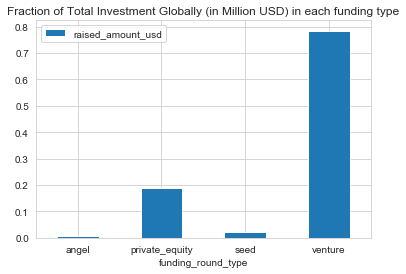

In [64]:
#Plotting howing the fraction of total investments (globally) in angel, venture, seed, and private equity, 
table1.plot(kind='bar',title ='Fraction of Total Investment Globally (in Million USD) in each funding type',legend=True, rot=0)

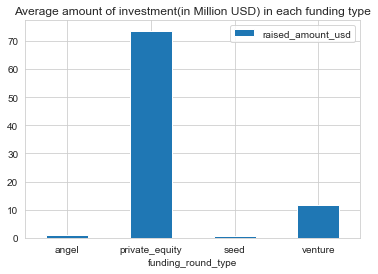

In [65]:
#and the average amount of investment in each funding type.
table2.plot(kind='bar', title ='Average amount of investment(in Million USD) in each funding type',legend=True, rot=0)

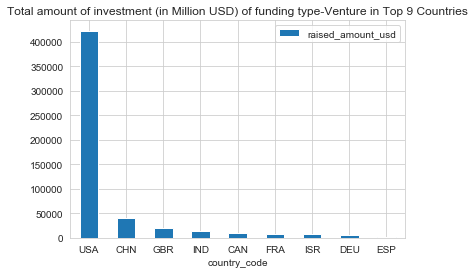

In [66]:
#plot showing the top 9 countries against the total amount of investments of funding type FT

top9_plt=top9.groupby(top9.country_code)['raised_amount_usd'].sum().sort_values(ascending=False).head(9)/1000000
top9_plt.to_frame()
top9_plt.plot(kind='bar', title ='Total amount of investment (in Million USD) of funding type-Venture in Top 9 Countries',legend=True, rot=0)

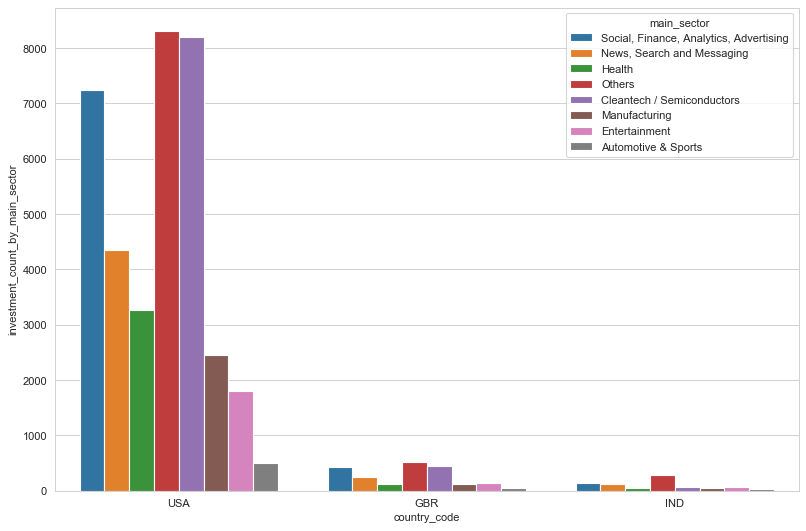

In [83]:
#Plotting Top 3 countries all sectors
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')

sns.barplot(x='country_code', y='investment_count_by_main_sector', hue="main_sector", data=top3)
plt.show()

In [100]:
top3 = pd.concat([D1[D1['main_sector'].isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])],D2[D2.main_sector.isin(['Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising'])],
                D3[D3.main_sector.isin(['Others','Social, Finance, Analytics, Advertising','News, Search and Messaging'])]])



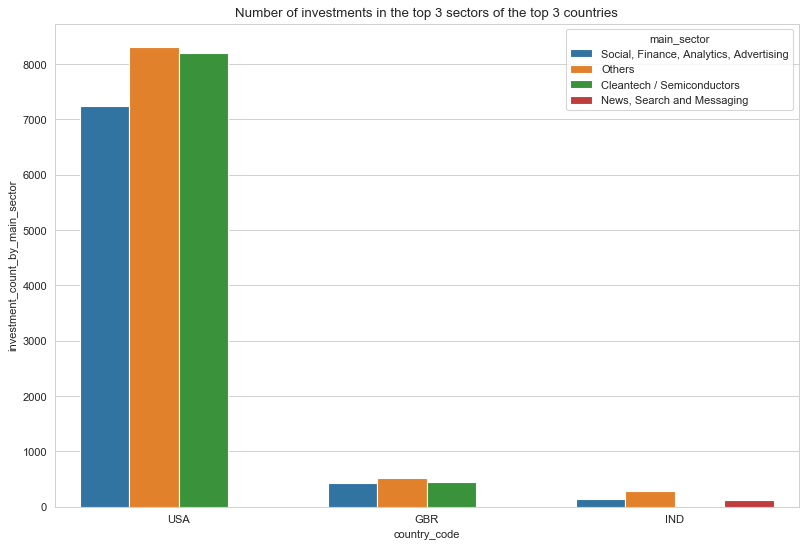

In [103]:
#Plotting Top 3 countries and their respective top 3 sectors
plt.figure(num=None, figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
sns.barplot(x='country_code', y='investment_count_by_main_sector', hue="main_sector", data=top3).set_title('Number of investments in the top 3 sectors of the top 3 countries')
plt.show()